In [17]:
import pandas as pd
import io

In [18]:
all_data=pd.read_csv("dataset.data",nrows=25175)

c:\Users\smart\Anaconda3\envs\workspace\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,76) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
all_data

,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,712232,375.0,NaN,2944.0,63,3,9,58,1,1,...,NaN,NaN,NaN,2.944096e+10,-0.630351,68.37,NaN,4,1,NaN
1,712240,383.0,NaN,2997.0,28,1,9,58,1,1,...,NaN,NaN,NaN,2.997096e+10,-4.369212,68.37,NaN,4,1,NaN
2,109886,246.0,NaN,NaN,58,1,9,62,1,2,...,1.0,1.0,9.620340e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,712216,359.0,NaN,2706.0,196,1,9,58,1,1,...,NaN,NaN,NaN,2.706096e+10,-2.996541,68.37,NaN,4,1,NaN
4,712224,367.0,NaN,2777.0,253,1,9,58,1,1,...,NaN,NaN,NaN,2.777096e+10,-3.951137,68.37,NaN,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25170,643135,410.0,401.0,6366.0,244,1,9,3,1,2,...,NaN,NaN,NaN,6.366090e+10,5.052841,54.85,NaN,4,1,NaN
25171,643143,938.0,1009.0,6483.0,66,1,9,3,1,2,...,NaN,NaN,NaN,6.483090e+10,0.292205,54.85,NaN,4,1,NaN
25172,102148,38.0,NaN,NaN,56,1,9,61,2,0,...,1.0,2.0,9.610740e+13,NaN,NaN,54.00,NaN,4,3,NaN
25173,643119,394.0,385.0,6140.0,34,1,9,3,1,2,...,NaN,NaN,NaN,6.140090e+10,-2.376460,54.85,NaN,4,1,NaN


In [20]:
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = all_data[columns].copy()

In [21]:
for column in columns:
    death[column].fillna(death[column].mode()[0], inplace=True)


In [22]:
death.isnull().sum()

age                      0
sex                      0
highest_qualification    0
rural                    0
disability_status        0
is_water_filter          0
chew                     0
smoke                    0
alcohol                  0
treatment_source         0
dtype: int64

In [23]:
death

,age,sex,highest_qualification,rural,disability_status,is_water_filter,chew,smoke,alcohol,treatment_source
0,43.0,1.0,4.0,1,0.0,2.0,7.0,4.0,4.0,0.0
1,70.0,2.0,0.0,1,0.0,2.0,5.0,4.0,4.0,9.0
2,57.0,2.0,3.0,1,0.0,2.0,7.0,4.0,4.0,0.0
3,50.0,1.0,0.0,1,0.0,2.0,1.0,1.0,1.0,9.0
4,65.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25170,38.0,1.0,4.0,1,0.0,2.0,3.0,4.0,4.0,9.0
25171,38.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,8.0
25172,42.0,1.0,0.0,2,0.0,2.0,1.0,1.0,4.0,6.0
25173,35.0,1.0,0.0,1,0.0,2.0,7.0,1.0,4.0,8.0


In [24]:
death.dtypes

age                      float64
sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [25]:
x=death.drop('age',axis=1)
y=death['age']

In [26]:
x.shape

(25175, 9)

In [27]:
x.dtypes

sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [28]:
y.shape

(25175,)

In [29]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104,test_size=0.25,shuffle=True)

In [30]:
X_train.shape

(18881, 9)

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred = reg.predict(X_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

11.937781159786292
203.60133116755716
0.04146390900500163


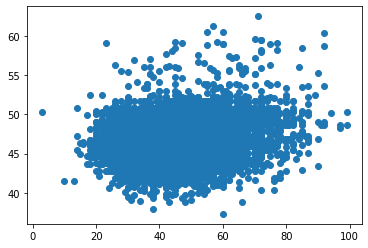

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(reg,X_train,y_train,cv=10,n_jobs=-1)
print('Accuracy: {:.2f} %'.format(cvs.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cvs.std()*100))

Accuracy: 3.84 %
Standard Deviation: 0.82 %


In [68]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 205.11732706512902
R-squared (R2) Score: 0.034326741613757705


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Use linear activation for regression

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [59]:
# Define callback functions
checkpoint = ModelCheckpoint('best_model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
def scheduler(epoch, lr):
    # Define learning rate scheduler function
    if epoch < 50:
        return lr
    else:
        return lr * 0.1
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

In [60]:
learning = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=True,
                    validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping, lr_scheduler])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.10000000149011612.
Epoch 1/100
587/591 [============================>.] - ETA: 0s - loss: 287.4823 - root_mean_squared_error: 16.9553
Epoch 00001: val_loss improved from inf to 206.39902, saving model to best_model.01-206.40.h5
591/591 [==============================] - 2s 3ms/step - loss: 287.1456 - root_mean_squared_error: 16.9454 - val_loss: 206.3990 - val_root_mean_squared_error: 14.3666

Epoch 00002: LearningRateScheduler reducing learning rate to 0.10000000149011612.
Epoch 2/100
590/591 [============================>.] - ETA: 0s - loss: 222.3145 - root_mean_squared_error: 14.9102
Epoch 00002: val_loss did not improve from 206.39902
591/591 [==============================] - 2s 4ms/step - loss: 222.3064 - root_mean_squared_error: 14.9099 - val_loss: 209.4920 - val_root_mean_squared_error: 14.4738

Epoch 00003: LearningRateScheduler reducing learning rate to 0.10000000149011612.
Epoch 3/100
582/591 [===================

In [61]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 212.9460


In [62]:
import matplotlib.pyplot as plt

In [63]:
def plot(learning):
  plt.plot(learning.history['loss'])
  plt.xlabel("epochs")
  plt.ylabel("Cost")

  plt.show()


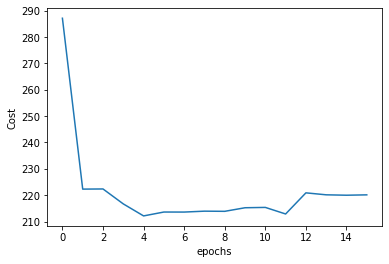

In [64]:
plot(learning)

In [65]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(9, 64) dtype=float32, numpy=
 array([[-6.96983486e-02, -4.66652006e-01,  2.50819087e-01,
         -4.03178632e-01, -2.01007053e-01, -5.44434309e-01,
         -8.10218513e-01, -4.15979028e-01, -5.64948142e-01,
         -5.80097139e-01, -8.81188810e-01,  1.84626937e-01,
         -3.67763191e-01, -2.19940126e-01, -2.55165637e-01,
         -7.64534354e-01,  1.19019084e-01, -1.98470503e-01,
         -3.66578281e-01, -5.65478802e-01, -8.19266737e-01,
         -1.79027900e-01, -6.44648969e-01, -8.60403657e-01,
         -5.05969226e-01, -2.06630766e-01, -7.18178213e-01,
         -8.81597042e-01, -3.73193860e-01, -9.88935947e-01,
         -5.78256071e-01, -6.08838916e-01, -3.82609338e-01,
         -5.34768462e-01, -7.16523170e-01, -7.19237387e-01,
         -7.58819759e-01, -4.29701596e-01, -6.58414885e-02,
         -2.07177121e-02, -4.19760376e-01, -7.55376577e-01,
         -4.77958381e-01, -1.61530957e-01, -2.24095643e-01,
         -5.77447951e-01, -1.67

In [66]:
model.predict(X_test)

array([[47.65026],
       [47.65026],
       [47.65026],
       ...,
       [47.65026],
       [47.65026],
       [47.65026]], dtype=float32)

In [67]:
jsonfile=model.to_json()
with open ("model.json","w") as f:
  f.write(jsonfile)

model.save("model.h5")

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_dim=x.shape[1]))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))

In [74]:
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)


Epoch 1/100
296/296 [==============================] - 1s 3ms/step - loss: 1073.5278
Epoch 2/100
296/296 [==============================] - 1s 2ms/step - loss: 226.2665
Epoch 3/100
296/296 [==============================] - 1s 2ms/step - loss: 215.9386
Epoch 4/100
296/296 [==============================] - 1s 2ms/step - loss: 212.0518
Epoch 5/100
296/296 [==============================] - 1s 2ms/step - loss: 210.0043
Epoch 6/100
296/296 [==============================] - 1s 2ms/step - loss: 208.8994
Epoch 7/100
296/296 [==============================] - 1s 2ms/step - loss: 208.0073
Epoch 8/100
296/296 [==============================] - 1s 2ms/step - loss: 206.9519
Epoch 9/100
296/296 [==============================] - 1s 2ms/step - loss: 206.5444
Epoch 10/100
296/296 [==============================] - 1s 2ms/step - loss: 205.9798
Epoch 11/100
296/296 [==============================] - 1s 2ms/step - loss: 205.3939
Epoch 12/100
296/296 [==============================] - 1s 2ms/step - los

In [75]:
y_pred = model2.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 191.77556935765304
R-squared (R2) Score: 0.09713849341611613


In [77]:
model2.save('scaled_model_191MSE.h5')

In [80]:
x.max()

sex                       2.0
highest_qualification     9.0
rural                     2.0
disability_status         7.0
is_water_filter           2.0
chew                      7.0
smoke                     4.0
alcohol                   4.0
treatment_source         99.0
dtype: float64